## Comparing experiments

This norebook is used to compare the results accross experiments containing different candiate algorithms

In [1]:
import pickle
import numpy as np
import pandas as pd
import os

from nsga_population import *
from typing import List
from individual import Individual

import matplotlib.pyplot as plt
import seaborn as sns

log_base = "..\\..\\logdata\\"
experiment_folders = ["Experiment_1_2024-10-09_17_20_37_666716", "Experiment_1_2024-10-09_19_23_14_435359"]


Obtaining the filenames of the log files in the current experiment

In [2]:
df_list = []
for experiment_folder in experiment_folders:
    cur_experiment_path = os.path.join(log_base, experiment_folder)
    filenames = os.listdir(cur_experiment_path)
    for f_name in filenames:
        if f_name[-4:] == ".csv":
            # identify the csv files
            cur_csv_path = os.path.join(os.path.join(log_base, experiment_folder), f_name)
            test_df = pd.read_csv(cur_csv_path, index_col=False)
            result_df = test_df[test_df["Iteration"] == test_df["Iteration"].max()].reset_index(drop=True)
            result_df = result_df[result_df["Problem"].isin(["ft06", "ft10", "ft20"])]
            # Add column
            result_df["Experiment"] = pd.Series([experiment_folder for i in range(result_df.shape[0])])
            df_list.append(result_df)

comp_df = pd.concat(df_list)        

In [3]:
plot_df = comp_df.groupby(["Experiment", "Problem", "Candidate"]).agg({col_name : {"mean", "std"} for col_name in comp_df.columns[5:-1]})
plot_df

Min Makespan  \
                                                                                  mean   
Experiment                              Problem Candidate                                
Experiment_1_2024-10-09_17_20_37_666716 ft06    quantum_position_encoding         57.0   
                                        ft10    quantum_position_encoding       1002.0   
                                        ft20    quantum_position_encoding       1280.3   
Experiment_1_2024-10-09_19_23_14_435359 ft06    classical                         57.4   
                                        ft10    classical                       1023.5   
                                        ft20    classical                       1329.6   

                                                                                      \
                                                                                 std   
Experiment                              Problem Candidate                              
Experiment_1_2024-10-09_17_20_37_666716 ft06    quantum_position_encoding   0.000000   
                                        ft10    quantum_position_encoding  10.274023   
                                        ft20    quantum_position_encoding  11.372970   
Experiment_1_2024-10-09_19_23_14_435359 ft06    classical                   0.516398   
                                        ft10    classical                  14.462595   
                                        ft20    classical                  14.908610   

                                                                          Max Makespan  \
                                                                                  mean   
Experiment                              Problem Candidate                                
Experiment_1_2024-10-09_17_20_37_666716 ft06    quantum_position_encoding         58.0   
                                        ft10    quantum_position_encoding       1106.4   
                                        ft20    quantum_position_encoding       1328.0   
Experiment_1_2024-10-09_19_23_14_435359 ft06    classical                         59.0   
                                        ft10    classical                       1120.5   
                                        ft20    classical                       1386.6   

                                                                                      \
                                                                                 std   
Experiment                              Problem Candidate                              
Experiment_1_2024-10-09_17_20_37_666716 ft06    quantum_position_encoding   0.000000   
                                        ft10    quantum_position_encoding  66.218829   
                                        ft20    quantum_position_encoding  33.757304   
Experiment_1_2024-10-09_19_23_14_435359 ft06    classical                   3.162278   
                                        ft10    classical                  43.648215   
                                        ft20    classical                  52.241320   

                                                                          Avg Makespan  \
                                                                                  mean   
Experiment                              Problem Candidate                                
Experiment_1_2024-10-09_17_20_37_666716 ft06    quantum_position_encoding    57.739837   
                                        ft10    quantum_position_encoding  1043.992857   
                                        ft20    quantum_position_encoding  1301.433095   
Experiment_1_2024-10-09_19_23_14_435359 ft06    classical                    58.087051   
                                        ft10    classical                  1062.861667   
                                        ft20    classical                  1351.929286   

                                                       

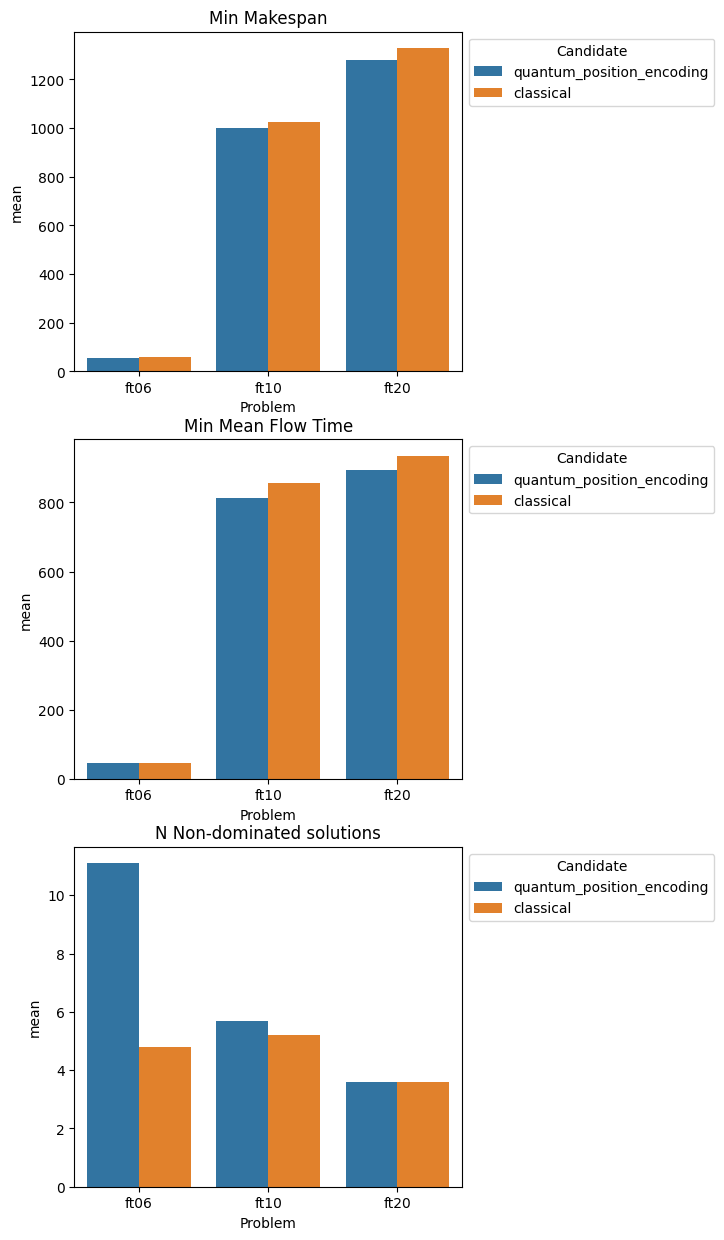

In [4]:
fig, ax = plt.subplots(3, 1, figsize=(5, 15))
ax[0].set_title("Min Makespan")
ax[1].set_title("Min Mean Flow Time")
ax[2].set_title("N Non-dominated solutions")

sns_ax_1 = sns.barplot(data=plot_df["Min Makespan"], x="Problem", y="mean", hue="Candidate", ax=ax[0])
sns.move_legend(sns_ax_1, "upper left", bbox_to_anchor=(1, 1))

sns_ax_2 = sns.barplot(data=plot_df["Min Mean Flow Time"], x="Problem", y="mean", hue="Candidate", ax=ax[1])
sns.move_legend(sns_ax_2, "upper left", bbox_to_anchor=(1, 1))

sns_ax_3 = sns.barplot(data=plot_df["N Non-dominated solutions"], x="Problem", y="mean", hue="Candidate", ax=ax[2])
sns.move_legend(sns_ax_3, "upper left", bbox_to_anchor=(1, 1))

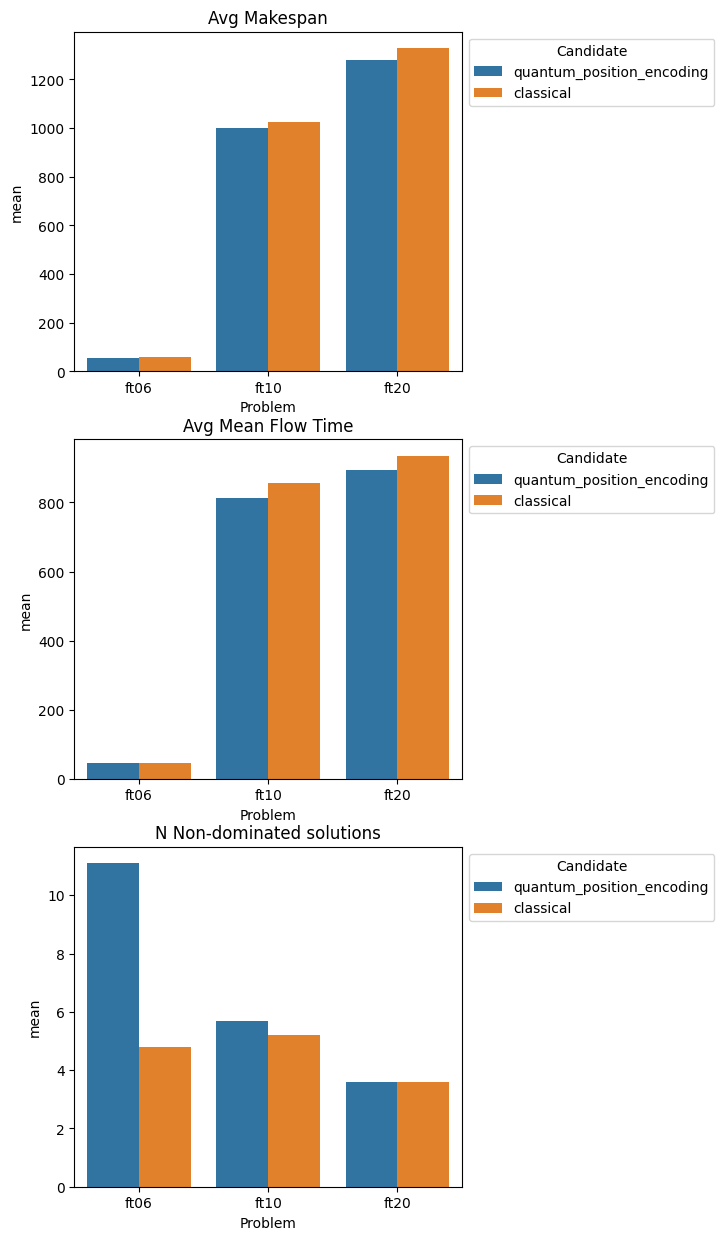

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(5, 15))
ax[0].set_title("Avg Makespan")
ax[1].set_title("Avg Mean Flow Time")
ax[2].set_title("N Non-dominated solutions")

sns_ax_1 = sns.barplot(data=plot_df["Min Makespan"], x="Problem", y="mean", hue="Candidate", ax=ax[0])
sns.move_legend(sns_ax_1, "upper left", bbox_to_anchor=(1, 1))

sns_ax_2 = sns.barplot(data=plot_df["Min Mean Flow Time"], x="Problem", y="mean", hue="Candidate", ax=ax[1])
sns.move_legend(sns_ax_2, "upper left", bbox_to_anchor=(1, 1))

sns_ax_3 = sns.barplot(data=plot_df["N Non-dominated solutions"], x="Problem", y="mean", hue="Candidate", ax=ax[2])
sns.move_legend(sns_ax_3, "upper left", bbox_to_anchor=(1, 1))